In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator


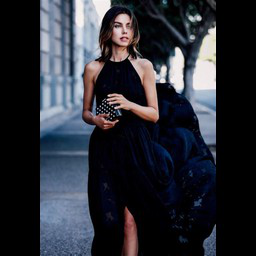

In [4]:
path = './dataset/black_dress'
name = '3.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
train_datagen = ImageDataGenerator(
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        './dataset',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        './dataset', 
        subset='validation')

Found 12949 images belonging to 37 classes.
Found 3221 images belonging to 37 classes.


In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input


In [9]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)
train_ds = train_gen.flow_from_directory('./dataset', subset='training', target_size=(150, 150), batch_size=32, class_mode='categorical')
val_ds = train_gen.flow_from_directory('./dataset', subset='validation', target_size=(150, 150), batch_size=32, shuffle=False)


Found 12949 images belonging to 37 classes.
Found 3221 images belonging to 37 classes.


In [10]:
train_ds.class_indices

{'black_dress': 0,
 'black_pants': 1,
 'black_shirt': 2,
 'black_shoes': 3,
 'black_shorts': 4,
 'black_suit': 5,
 'blue_dress': 6,
 'blue_pants': 7,
 'blue_shirt': 8,
 'blue_shoes': 9,
 'blue_shorts': 10,
 'brown_hoodie': 11,
 'brown_pants': 12,
 'brown_shoes': 13,
 'green_pants': 14,
 'green_shirt': 15,
 'green_shoes': 16,
 'green_shorts': 17,
 'green_suit': 18,
 'pink_hoodie': 19,
 'pink_pants': 20,
 'pink_skirt': 21,
 'red_dress': 22,
 'red_hoodie': 23,
 'red_pants': 24,
 'red_shirt': 25,
 'red_shoes': 26,
 'silver_shoes': 27,
 'silver_skirt': 28,
 'white_dress': 29,
 'white_pants': 30,
 'white_shoes': 31,
 'white_shorts': 32,
 'white_suit': 33,
 'yellow_dress': 34,
 'yellow_shorts': 35,
 'yellow_skirt': 36}

In [11]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(37)(vectors)
model = keras.Model(inputs, outputs)

In [12]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
405/405 [==============================] - 122s 292ms/step - loss: 2.0306 - accuracy: 0.5782 - val_loss: 1.4858 - val_accuracy: 0.7007
Epoch 2/10
405/405 [==============================] - 133s 328ms/step - loss: 1.1169 - accuracy: 0.7452 - val_loss: 1.7617 - val_accuracy: 0.6836
Epoch 3/10
405/405 [==============================] - 138s 341ms/step - loss: 0.8727 - accuracy: 0.7977 - val_loss: 1.6651 - val_accuracy: 0.7131
Epoch 4/10
405/405 [==============================] - 145s 359ms/step - loss: 0.7145 - accuracy: 0.8321 - val_loss: 1.6397 - val_accuracy: 0.7429
Epoch 5/10
405/405 [==============================] - 163s 402ms/step - loss: 0.5217 - accuracy: 0.8717 - val_loss: 1.7833 - val_accuracy: 0.7287
Epoch 6/10
405/405 [==============================] - 162s 401ms/step - loss: 0.4563 - accuracy: 0.8856 - val_loss: 1.5451 - val_accuracy: 0.7600
Epoch 7/10
405/405 [==============================] - 159s 393ms/step - loss: 0.4056 - accuracy: 0.8957 - val_loss: 2.1321 -

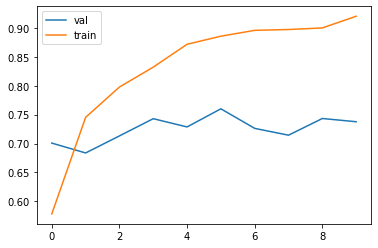

In [16]:
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')
plt.legend()

### As seen above, validation accuracy is in range of 0.74 where as training accuracy reaches 0.92

### Tuning the model based on Learning Rate

In [17]:
def build_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(37)(vectors)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [18]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = build_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
405/405 [==============================] - 118s 290ms/step - loss: 2.5062 - accuracy: 0.3172 - val_loss: 1.8272 - val_accuracy: 0.4983
Epoch 2/10
405/405 [==============================] - 130s 321ms/step - loss: 1.6273 - accuracy: 0.5470 - val_loss: 1.4212 - val_accuracy: 0.5980
Epoch 3/10
405/405 [==============================] - 135s 333ms/step - loss: 1.3286 - accuracy: 0.6271 - val_loss: 1.2276 - val_accuracy: 0.6476
Epoch 4/10
405/405 [==============================] - 142s 351ms/step - loss: 1.1610 - accuracy: 0.6744 - val_loss: 1.1152 - val_accuracy: 0.6715
Epoch 5/10
405/405 [==============================] - 156s 384ms/step - loss: 1.0490 - accuracy: 0.7028 - val_loss: 1.0372 - val_accuracy: 0.6936
Epoch 6/10
405/405 [==============================] - 157s 389ms/step - loss: 0.9662 - accuracy: 0.7249 - val_loss: 0.9798 - val_accuracy: 0.7082
Epoch 7/10
405/405 [==============================] - 160s 396ms/step - loss: 0.9002 - accuracy: 0.7448 - val_loss: 0

#### Looking at the val_accuracy numbers, learning rate = 0.001 seems to be the best.

### Experimenting with Different sizes of inner layer

In [20]:
def build_model(learning_rate=0.01,size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(37)(inner)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [22]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = build_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
405/405 [==============================] - 122s 296ms/step - loss: 2.5030 - accuracy: 0.3111 - val_loss: 1.6517 - val_accuracy: 0.5380
Epoch 2/10
405/405 [==============================] - 136s 335ms/step - loss: 1.3694 - accuracy: 0.5878 - val_loss: 1.1734 - val_accuracy: 0.6355
Epoch 3/10
405/405 [==============================] - 141s 349ms/step - loss: 1.0778 - accuracy: 0.6570 - val_loss: 1.0237 - val_accuracy: 0.6836
Epoch 4/10
405/405 [==============================] - 151s 374ms/step - loss: 0.9516 - accuracy: 0.6900 - val_loss: 0.9483 - val_accuracy: 0.7029
Epoch 5/10
405/405 [==============================] - 170s 420ms/step - loss: 0.8691 - accuracy: 0.7152 - val_loss: 0.9114 - val_accuracy: 0.7147
Epoch 6/10
405/405 [==============================] - 181s 447ms/step - loss: 0.8091 - accuracy: 0.7319 - val_loss: 0.8970 - val_accuracy: 0.7103
Epoch 7/10
405/405 [==============================] - 178s 439ms/step - loss: 0.7625 - accuracy: 0.7492 - val_loss: 0.858

#### From the previous runs, inner layer size of 100 and 1000 seems to be better. Picking 100 as the number of inner layers

### Experimenting with Regularization and dropout

In [23]:
def build_model(learning_rate=0.001,size_inner=100,droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(37)(drop)
    
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [24]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = build_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/10
405/405 [==============================] - 119s 292ms/step - loss: 1.3488 - accuracy: 0.5890 - val_loss: 0.8881 - val_accuracy: 0.7035
Epoch 2/10
405/405 [==============================] - 132s 327ms/step - loss: 0.7330 - accuracy: 0.7567 - val_loss: 0.7307 - val_accuracy: 0.7544
Epoch 3/10
405/405 [==============================] - 139s 344ms/step - loss: 0.5539 - accuracy: 0.8114 - val_loss: 0.7135 - val_accuracy: 0.7544
Epoch 4/10
405/405 [==============================] - 150s 369ms/step - loss: 0.4403 - accuracy: 0.8511 - val_loss: 0.7204 - val_accuracy: 0.7566
Epoch 5/10
405/405 [==============================] - 172s 425ms/step - loss: 0.3627 - accuracy: 0.8791 - val_loss: 0.7256 - val_accuracy: 0.7687
Epoch 6/10
405/405 [==============================] - 165s 407ms/step - loss: 0.2988 - accuracy: 0.9040 - val_loss: 0.6780 - val_accuracy: 0.7793
Epoch 7/10
405/405 [==============================] - 171s 421ms/step - loss: 0.2388 - accuracy: 0.9231 - val_loss: 0.69

#### Looking at the values for Validation Accuracy, dropout rate of 0.2 seems to provide better accuracy compared to others.

#### Saving the model with the above parameters as Version1

In [25]:
learning_rate = 0.001
size = 100
droprate = 0.2

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

model = build_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)


Epoch 1/10
405/405 [==============================] - 119s 291ms/step - loss: 1.5613 - accuracy: 0.5245 - val_loss: 0.9093 - val_accuracy: 0.7029


/Users/deepa/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
405/405 [==============================] - 129s 319ms/step - loss: 0.9156 - accuracy: 0.7052 - val_loss: 0.7569 - val_accuracy: 0.7451
Epoch 3/10
405/405 [==============================] - 137s 337ms/step - loss: 0.7314 - accuracy: 0.7545 - val_loss: 0.6770 - val_accuracy: 0.7631
Epoch 4/10
405/405 [==============================] - 144s 355ms/step - loss: 0.6191 - accuracy: 0.7924 - val_loss: 0.6689 - val_accuracy: 0.7575
Epoch 5/10
405/405 [==============================] - 165s 408ms/step - loss: 0.5378 - accuracy: 0.8196 - val_loss: 0.6496 - val_accuracy: 0.7743
Epoch 6/10
405/405 [==============================] - 168s 414ms/step - loss: 0.4697 - accuracy: 0.8413 - val_loss: 0.6497 - val_accuracy: 0.7821
Epoch 7/10
405/405 [==============================] - 167s 413ms/step - loss: 0.4204 - accuracy: 0.8551 - val_loss: 0.6481 - val_accuracy: 0.7802
Epoch 8/10
405/405 [==============================] - 189s 467ms/step - loss: 0.3711 - accuracy: 0.8706 - val_loss: 0.6649 -

#### In the previous step, I used a checkpoint callback to save the model with the best accuracy. Seems like the epoch=9 was the best. We will use this model for the deployment.